#Importing Libraries

In [ ]:
!pip install -q keras

import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from tensorflow.keras.optimizers import Adam
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda
from keras.layers.merge import concatenate
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.models import load_model
from keras.callbacks import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from tensorflow.compat.v1.keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
# Create a session with the above options specified.
k.set_session(tf.compat.v1.Session(config=config))

#Model Architecture

In [ ]:
# number of classes
num_classes = 200
# input image dimensions
img_height = 32
img_width = 32
channels = 3

# Hyperparameters
batch_size = 200
num_classes = 200
epochs = 15
num_train = 100000
num_validation = 10000

In [ ]:
def space_to_depth_x2(x):
    import tensorflow as tf
    return tf.nn.space_to_depth(x, 2)

In [ ]:
input = Input(shape=(img_height, img_width, channels))

# Block 1

layer1 = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input)
layer1 = BatchNormalization(name='norm_1')(layer1)
layer1 = Activation("relu")(layer1)

layer2 = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(layer1)
layer2 = BatchNormalization(name='norm_2')(layer2)
layer2 = Activation("relu")(layer2)

layer3 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(layer2)
layer3 = BatchNormalization(name='norm_3')(layer3)
layer3 = Activation("relu")(layer3)

layer4 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_4', use_bias=False)(layer3)
layer4 = BatchNormalization(name='norm_4')(layer4)
layer4 = Activation("relu")(layer4)

layer5 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(layer4)
layer5 = BatchNormalization(name='norm_5')(layer5)
layer5 = Activation("relu")(layer5)

layer6 = MaxPooling2D(pool_size=(2, 2))(layer5)

skip_connection_1 = layer6

# Block 2

layer7 = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_7', use_bias=False)(layer6)
layer7 = BatchNormalization(name='norm_7')(layer7)
layer7 = Activation("relu")(layer7)

layer8 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(layer7)
layer8 = BatchNormalization(name='norm_8')(layer8)
layer8 = Activation("relu")(layer8)

layer9 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(layer8)
layer9 = BatchNormalization(name='norm_9')(layer9)
layer9 = Activation("relu")(layer9)

layer10 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_10', use_bias=False)(layer9)
layer10 = BatchNormalization(name='norm_10')(layer10)
layer10 = Activation("relu")(layer10)

layer11 = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(layer10)
layer11 = BatchNormalization(name='norm_11')(layer11)
layer11 = Activation("relu")(layer11)

layer12 = MaxPooling2D(pool_size=(2, 2))(layer11)

skip_connection_1 = Lambda(space_to_depth_x2)(skip_connection_1)

layer13 = concatenate([skip_connection_1, layer12])

skip_connection_2 = layer13

# Block 3

layer14 = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(layer13)
layer14 = BatchNormalization(name='norm_14')(layer14)
layer14 = Activation("relu")(layer14)

layer15 = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_15', use_bias=False)(layer14)
layer15 = BatchNormalization(name='norm_15')(layer15)
layer15 = Activation("relu")(layer15)

layer16 = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(layer15)
layer16 = BatchNormalization(name='norm_16')(layer16)
layer16 = Activation("relu")(layer16)

layer17 = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_17', use_bias=False)(layer16)
layer17 = BatchNormalization(name='norm_17')(layer17)
layer17 = Activation("relu")(layer17)

layer18 = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(layer17)
layer18 = BatchNormalization(name='norm_18')(layer18)
layer18 = Activation("relu")(layer18)

layer19 = MaxPooling2D(pool_size=(2, 2))(layer18)

skip_connection_2 = Lambda(space_to_depth_x2)(skip_connection_2)

layer20 = concatenate([skip_connection_2, layer19])

layer21 = Conv2D(num_classes, (1,1), name='conv_21', use_bias=False)(layer20)
layer21 = BatchNormalization(name='norm_21')(layer21)

layer22 = GlobalAveragePooling2D(data_format=None)(layer21)

layer23 = Activation('softmax')(layer22)

output = layer23


#Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!unzip -qq 'tiny-imagenet-200.zip'

--2021-12-12 15:37:17--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  10.6MB/s    in 27s     

2021-12-12 15:37:45 (8.71 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
val_data = pd.read_csv('./tiny-imagenet-200/val/val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])
val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)
val_data.head(3)

,File,Class
0,val_0.JPEG,n03444034
1,val_1.JPEG,n04067472
2,val_2.JPEG,n04070727


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', 
                                                    target_size=(img_width, img_height), 
                                                    batch_size=batch_size, 
                                                    class_mode='categorical', 
                                                    shuffle=True, seed=101)

Found 100000 images belonging to 200 classes.


In [ ]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/',x_col='File', y_col='Class', 
                                                         target_size=(img_width, img_height),
                                                         class_mode='categorical', 
                                                         batch_size=batch_size, 
                                                         shuffle=False, seed=101)

Found 10000 validated image filenames belonging to 200 classes.


#Model

In [ ]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 32, 32, 32)   864         ['input_1[0][0]']                
                                                                                                  
 norm_1 (BatchNormalization)    (None, 32, 32, 32)   128         ['conv_1[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 32, 32, 32)   0           ['norm_1[0][0]']                 
                                                                                              

In [ ]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate= 0.0001, epsilon=1e-08),
              metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="./drive/My Drive/Colab Notebooks/model1.hdf5", verbose=1, save_best_only=True, monitor="val_accuracy")

#Model Training

In [ ]:
model.fit(train_generator,
          epochs=epochs,
          steps_per_epoch= num_train // batch_size,
          validation_steps= num_validation // batch_size,
          validation_data=validation_generator,
          verbose=1, callbacks=[lr_reducer, checkpointer])

Epoch 1/15
500/500 [==============================] - ETA: 0s - loss: 4.4357 - accuracy: 0.1106
Epoch 00001: val_accuracy improved from -inf to 0.07328, saving model to ./drive/My Drive/Colab Notebooks/model1.hdf5
500/500 [==============================] - 358s 678ms/step - loss: 4.4357 - accuracy: 0.1106 - val_loss: 4.6333 - val_accuracy: 0.0733 - lr: 1.0000e-04
Epoch 2/15
500/500 [==============================] - ETA: 0s - loss: 3.8611 - accuracy: 0.1959
Epoch 00002: val_accuracy improved from 0.07328 to 0.15687, saving model to ./drive/My Drive/Colab Notebooks/model1.hdf5
500/500 [==============================] - 338s 676ms/step - loss: 3.8611 - accuracy: 0.1959 - val_loss: 3.9730 - val_accuracy: 0.1569 - lr: 1.0000e-04
Epoch 3/15
500/500 [==============================] - ETA: 0s - loss: 3.5492 - accuracy: 0.2496
Epoch 00003: val_accuracy improved from 0.15687 to 0.18297, saving model to ./drive/My Drive/Colab Notebooks/model1.hdf5
500/500 [==============================] - 339s 

#Image Augmentation

In [ ]:
import imgaug as ia
from imgaug import augmenters as iaa

In [ ]:
# Defining Customized Imagedatagenerator using imgaug library
def CustomImageDataGen(input_img):
  
  sometimes = lambda aug: iaa.Sometimes(0.5, aug)
  
  seq = iaa.Sequential([
      iaa.Fliplr(0.5), # horizontal flips
      iaa.Flipud(0.2), # vertical flips
      
      # blur about 50% of all images.
      sometimes(iaa.GaussianBlur(sigma=(0, 2.0))),
      
      # crop images by -10% to 20% of their height/width
      sometimes(iaa.CropAndPad(
          percent=(-0.1, 0.2),
          pad_mode=ia.ALL,
          pad_cval=(0, 255)
        )),
      
      # Apply affine transformations to some of the images
      sometimes(iaa.Affine(
          scale={"x": (0.8, 1.5), "y": (0.8, 1.5)},
          translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
          rotate=(-45, 45),
          shear=(-16, 16),
          order=[0, 1],
          cval=(0, 255),
          mode=ia.ALL
      )),
      
      #drop 2-5% percent of the original size, leading to large dropped
      # rectangles.
      sometimes(iaa.CoarseDropout(
                        (0.03, 0.15), size_percent=(0.02, 0.05),
                        per_channel=0.2
                    )),
                
      # Make some images brighter and some darker.
      # In 20% of all cases, we sample the multiplier once per channel,
      sometimes(iaa.Multiply((0.8, 1.2), per_channel=0.2)),
      
      #Improve or worsen the contrast of images.
      sometimes(iaa.ContrastNormalization((0.75, 1.5), per_channel=0.5)), 
     ],
     # do all of the above augmentations in random order
     random_order = True) # apply augmenters in random order
  
  output_img = seq.augment_image(input_img)
  return output_img

train_datagen = ImageDataGenerator(rescale=1/255., preprocessing_function = CustomImageDataGen)
valid_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory( r'./tiny-imagenet-200/train/', 
                                                    target_size=(img_width, img_height), 
                                                    batch_size=batch_size, 
                                                    class_mode='categorical', 
                                                    shuffle=True, seed=101)

Found 100000 images belonging to 200 classes.


In [ ]:
validation_generator = valid_datagen.flow_from_dataframe(val_data, directory='./tiny-imagenet-200/val/images/',x_col='File', y_col='Class', 
                                                         target_size=(img_width, img_height),
                                                         class_mode='categorical', 
                                                         batch_size=batch_size, 
                                                         shuffle=False, seed=101)

Found 10000 validated image filenames belonging to 200 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


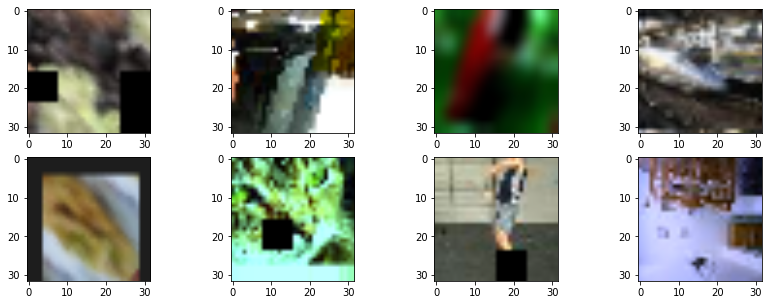

In [ ]:
x_batch, y_batch = next(train_generator)

fig = plt.figure(figsize=(14, 5))

for i in range(8):
    sub = fig.add_subplot(2, 4, i + 1)
    sub.imshow(x_batch[i,:,:], interpolation='bilinear')

In [ ]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
model = load_model('/content/drive/My Drive/Colab Notebooks/model1.hdf5')
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate= 0.0001, epsilon=1e-08),
              metrics=['accuracy'])
checkpointer_2 = ModelCheckpoint(filepath="./drive/My Drive/Colab Notebooks/model2.hdf5", verbose=1, save_best_only=True, monitor="val_accuracy")


In [ ]:
# fit the model
model.fit(train_generator,
          epochs=5,
          steps_per_epoch= num_train // batch_size,
          validation_steps= num_validation // batch_size,
          validation_data=validation_generator,
          verbose=1, callbacks=[lr_reducer, checkpointer_2]
          )

Epoch 1/5
500/500 [==============================] - ETA: 0s - loss: 3.9552 - accuracy: 0.1783
Epoch 00001: val_accuracy improved from -inf to 0.19710, saving model to ./drive/My Drive/Colab Notebooks/model2.hdf5
500/500 [==============================] - 1409s 3s/step - loss: 3.9552 - accuracy: 0.1783 - val_loss: 3.8577 - val_accuracy: 0.1971 - lr: 1.0000e-04
Epoch 2/5
500/500 [==============================] - ETA: 0s - loss: 3.7270 - accuracy: 0.2041
Epoch 00002: val_accuracy did not improve from 0.19710
500/500 [==============================] - 1375s 3s/step - loss: 3.7270 - accuracy: 0.2041 - val_loss: 3.9744 - val_accuracy: 0.1950 - lr: 1.0000e-04
Epoch 3/5
321/500 [==================>...........] - ETA: 8:04 - loss: 3.6464 - accuracy: 0.2175

#Model Testing

In [ ]:
num_test=10000
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

test_generator = test_datagen.flow_from_directory( r'./tiny-imagenet-200/test/', 
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,  
                                                    class_mode="categorical", 
                                                    shuffle=False)

Found 10000 images belonging to 1 classes.


In [ ]:
model = load_model('/content/drive/My Drive/Colab Notebooks/model1.hdf5')

In [ ]:
test_pred = model.predict(test_generator,steps=num_test//batch_size,verbose=1)

50/50 [==============================] - 15s 303ms/step


In [ ]:
predicted_class_indices = np.argmax(test_pred,axis=1)

In [ ]:
labels = (validation_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_labels = [labels[k] for k in predicted_class_indices]

In [ ]:
# Validation class names from words.txt
import os
class_to_name = dict()
file = open('tiny-imagenet-200/words.txt','r')
data= file.readlines()
for line in data:
  words = line.strip('\n').split('\t')
  if len(words)<=1:
    words = words[0].split(' ')
  class_to_name[words[0]] = words[1]
file.close()

In [ ]:
predicted_classes = np.array([class_to_name[i] for i in predicted_labels])

In [ ]:
file_name = np.array(test_generator.filenames)


In [ ]:
results = pd.DataFrame({'ImageFileName': file_name,'Predicted Class':predicted_classes})

In [113]:
results.ImageFileName = results.ImageFileName.apply(func= lambda x : x.replace("images/",""))

In [114]:
results.to_csv('./test_results.csv')